In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
from scipy.stats.distributions import uniform, expon, norm
import numpy as np
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('my_data.csv', delimiter=';')
df.Unaffect = df.Unaffect.apply(lambda x: x.replace(",","."))
df.Affected = df.Affected.apply(lambda x: x.replace(",","."))
df.Unaffect = df.Unaffect.astype('float64')
df.Affected = df.Affected.astype('float64')

## 1. (1b)
* Načtěte datový soubor a rozdělte sledovanou proměnnou na příslušné **dvě pozorované skupiny.**
* Data stručně popište. 
* Pro každu skupinu zvlášť odhadněte **střední hodnotu**, **rozptyl** a **medián** příslušného rozdělení.

In [4]:
describe = df.describe()
describe.loc['var'] = df.var() # rozptyl [odhadnut z prumeru... ]
describe.loc['median'] = df.median() # median [median...]
describe.loc['med'] = df.mean() # stredni hodnota [odhadnuta pomoci prumeru]
describe

,Unaffect,Affected
count,15.000000,15.000000
mean,1.758667,1.560000
std,0.242424,0.301259
min,1.250000,1.020000
25%,1.600000,1.310000
50%,1.770000,1.590000
75%,1.935000,1.780000
max,2.080000,2.020000
var,0.058770,0.090757
median,1.770000,1.590000


## 2. (1b) 
* Pro každou skupinu zvlášť odhadněte **hustotu** a **distribuční funkci** pomocí **histogramu** a **empirické distribuční funkce.**

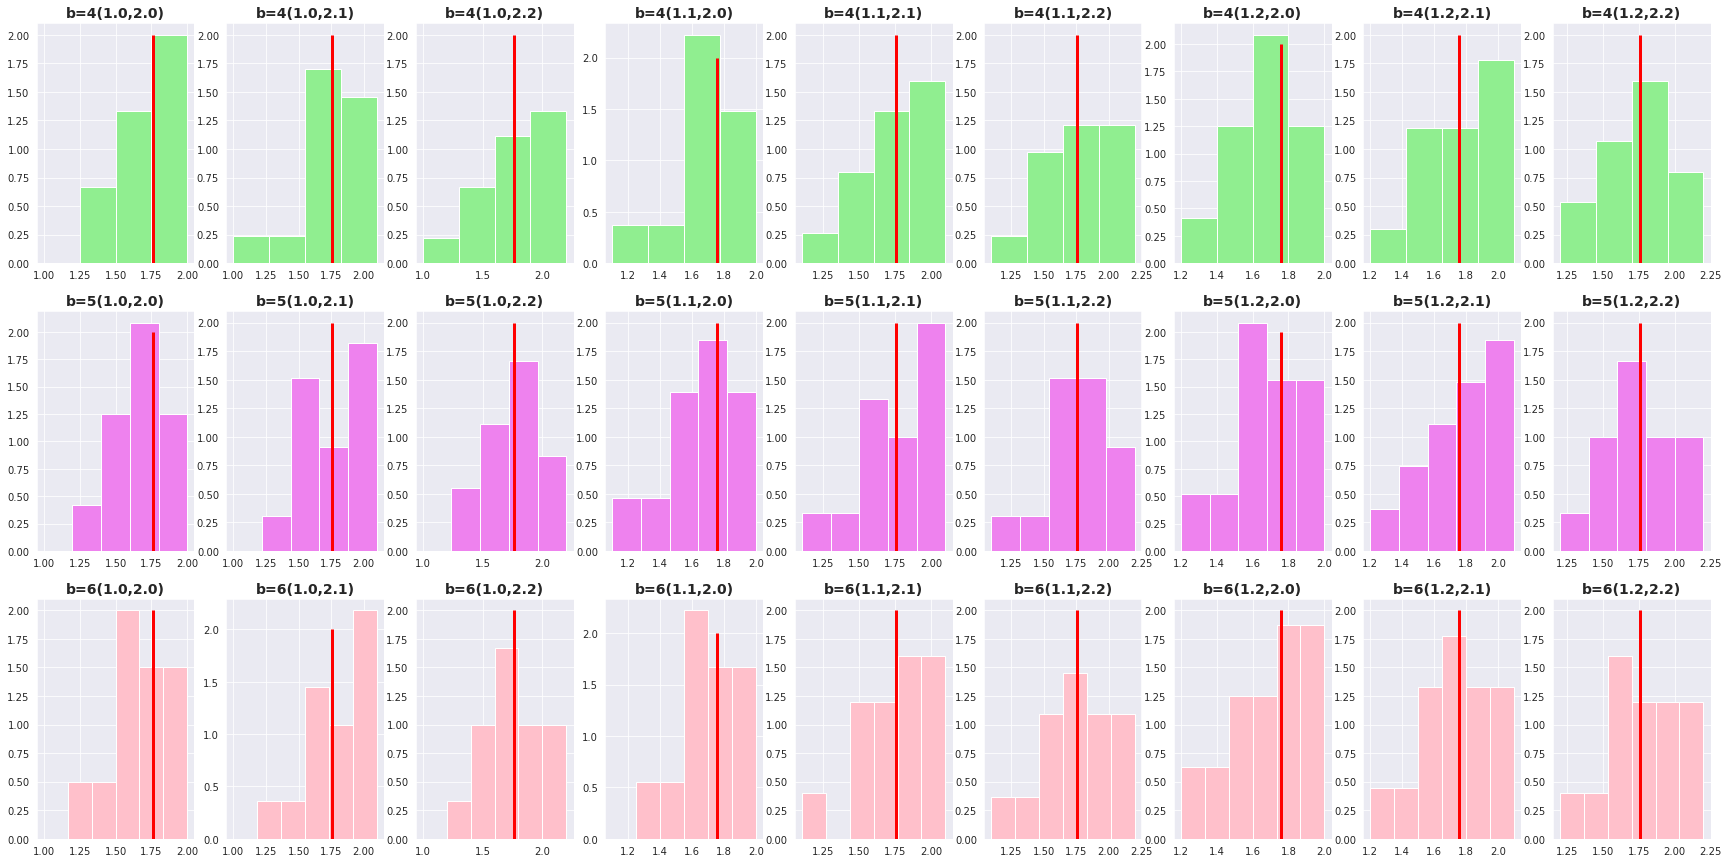

In [8]:
import seaborn as sns
sns.set_style('darkgrid')
from scipy.stats.distributions import uniform, expon, norm

i = 1
colors = {4:'lightgreen', 5:'violet', 6:'pink'}
plt.figure(figsize=(30,15)) # set dimensions of the figure
std_u = df.Unaffect.std()
mean_u = df.Unaffect.mean()
for x in range(4,7):
    c = colors[x]
    for a in np.linspace(1,1.2,3):
        for b in np.linspace(2,2.2,3):
            plt.subplot(3,9, i)       # create subplots on a grid with 3 rows and 6 columns
            plt.hist(df.Unaffect, bins=x, range=(a,b), color=c, density='normed')
            xx = np.linspace(a-0.5,b+0.5)
            #plt.plot(xx, norm.pdf(xx, loc=mean_u, scale=std_u), color='blue', lw=3)
            plt.vlines(x=mean_u, ymin=0, ymax=2, color='red', zorder=2, lw=3)
            
            plot_title = f'b={x}({a},{b})'
            plt.title(plot_title, fontsize=14, fontweight='bold')
            i +=1
plt.show()

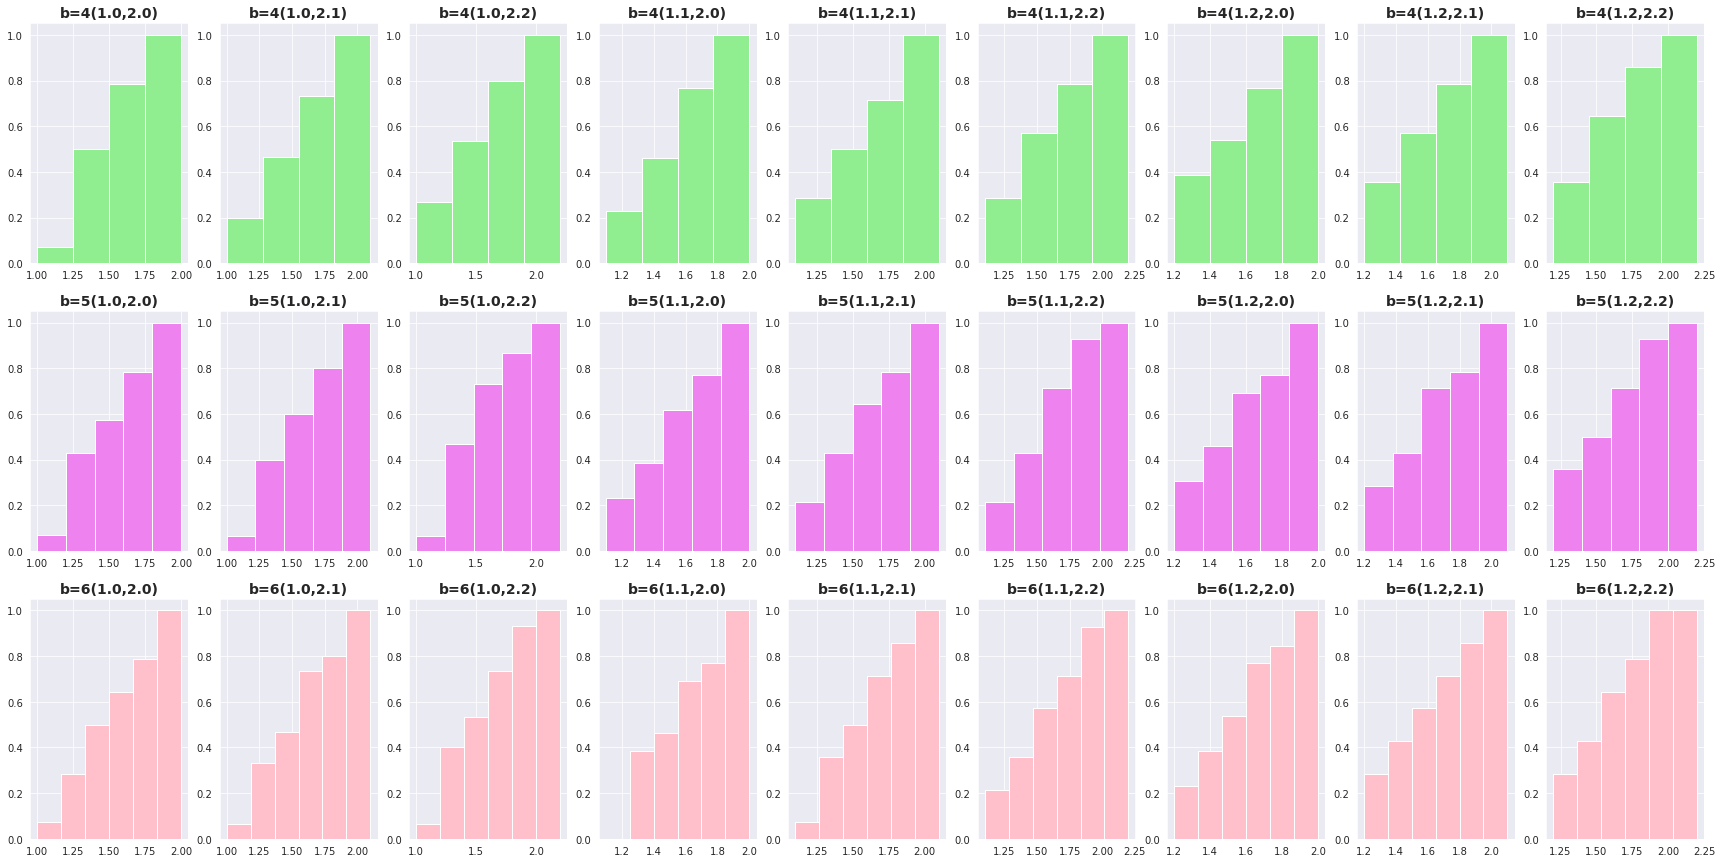

In [10]:
sns.set_style('darkgrid')
i = 1
colors = {4:'lightgreen', 5:'violet', 6:'pink'}
plt.figure(figsize=(30,15)) # set dimensions of the figure
std_u = df.Affected.std()
mean_u = df.Affected.mean()
for x in range(4,7):
    c = colors[x]
    for a in np.linspace(1,1.2,3):
        for b in np.linspace(2,2.2,3):
            plt.subplot(3,9, i)       # create subplots on a grid with 3 rows and 6 columns
            plt.hist(df.Affected, bins=x, range=(a,b), color=c, density='normed', cumulative=True)
            xx = np.linspace(a-0.5,b+0.5)             
            plot_title = f'b={x}({a},{b})'
            plt.title(plot_title, fontsize=14, fontweight='bold')
            i +=1
plt.show()

## 3. (3b) 
* Pro každou skupinu zvlášť najděte nejbližší rozdělení: 
* Odhadněte parametry **normálního**, **exponenciálního** a **rovnoměrného** rozdělení. 
* Zaneste příslušné **hustoty** s odhadnutými parametry do grafů histogramu. 
* Diskutujte, které z rozdělení odpovídá pozorovaným datům nejlépe.

### Normalni rozdeleni

Text(0,0.5,'Pravdepodobnost <= f(x)')

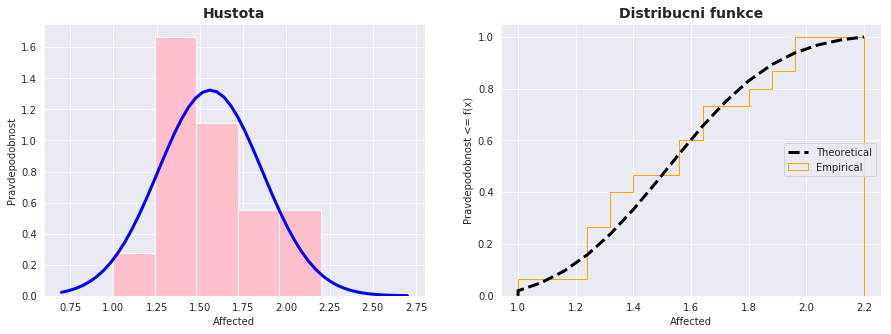

In [84]:
plt.figure(figsize=(15,5))

###########
# hustota #
###########
plt.subplot(1,2,1)
# skutecne hodnoty
plt.hist(df.Affected, bins=5, range=(1.0,2.2), color=c, density='normed')
# normalni rozdeleni
xx = np.linspace(a-0.5,b+0.5)
plt.plot(xx, norm.pdf(xx, loc=mean_u, scale=std_u), color='blue', lw=3)
# labels
plt.title('Hustota', fontsize=14, fontweight='bold')
plt.xlabel('Affected')
plt.ylabel('Pravdepodobnost')


######################
# Distribucni funkce #
######################
plt.subplot(1,2,2)

# Empirical
n, bins, patches = plt.hist(df.Affected, bins=15, range=(1.0,2.2), density='normed', cumulative=True, histtype='step',  label='Empirical', color='orange')

# Theoretical
y = ((1 / (np.sqrt(2 * np.pi) * std_u)) * np.exp(-0.5 * (1 / std_u * (bins - mean_u))**2))
y = y.cumsum()
y /= y[-1]
bins = np.insert(bins,0,1)
y = np.insert(y,0,0)

plt.plot(bins, y, 'k--', label='Theoretical', lw=3)
plt.legend(loc='right')
plt.title('Distribucni funkce',  fontsize=14, fontweight='bold')
plt.xlabel('Affected')
plt.ylabel('Pravdepodobnost <= f(x)')

### Exponencialni

Text(0,0.5,'Pravdepodobnost <= f(x)')

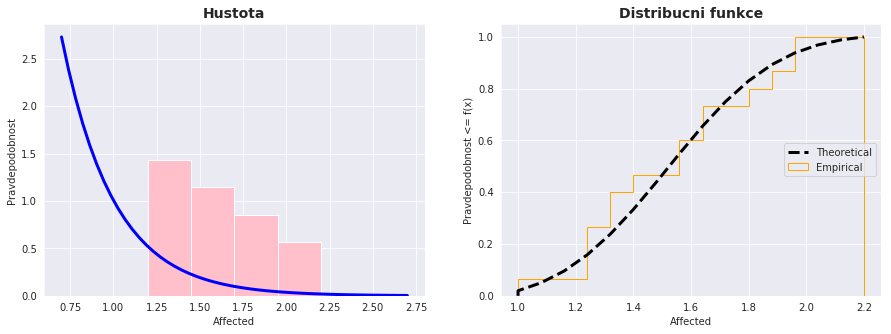

In [105]:
plt.figure(figsize=(15,5))

###########
# hustota #
###########
plt.subplot(1,2,1)
# skutecne hodnoty
plt.hist(df.Affected, bins=4, range=(1.2,2.2), color=c, density='normed')
# normalni rozdeleni
xx = np.linspace(a-0.5,b+0.5)
plt.plot(xx, expon.pdf(xx,loc=1/mean_u, scale=std_u), color='blue', lw=3)
# labels
plt.title('Hustota', fontsize=14, fontweight='bold')
plt.xlabel('Affected')
plt.ylabel('Pravdepodobnost')


######################
# Distribucni funkce #
######################
plt.subplot(1,2,2)

# Empirical
n, bins, patches = plt.hist(df.Affected, bins=15, range=(1.0,2.2), density='normed', cumulative=True, histtype='step',  label='Empirical', color='orange')

# Theoretical
y = ((1 / (np.sqrt(2 * np.pi) * std_u)) * np.exp(-0.5 * (1 / std_u * (bins - mean_u))**2))
y = y.cumsum()
y /= y[-1]
bins = np.insert(bins,0,1)
y = np.insert(y,0,0)

plt.plot(bins, y, 'k--', label='Theoretical', lw=3)
plt.legend(loc='right')
plt.title('Distribucni funkce',  fontsize=14, fontweight='bold')
plt.xlabel('Affected')
plt.ylabel('Pravdepodobnost <= f(x)')

### Rovnomerne

Text(0,0.5,'Pravdepodobnost <= f(x)')

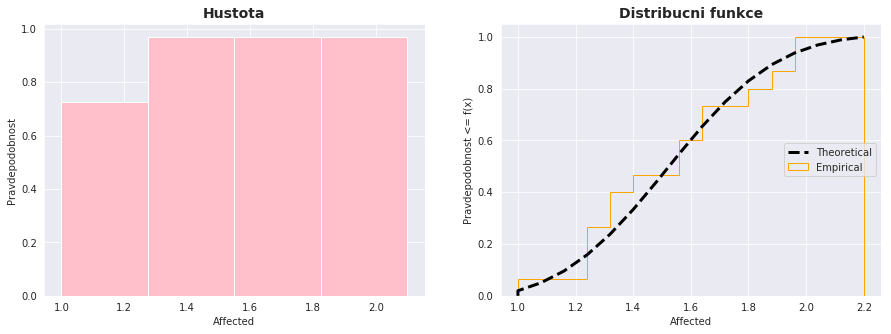

In [95]:
# uniform
plt.figure(figsize=(15,5))

###########
# hustota #
###########
plt.subplot(1,2,1)
# skutecne hodnoty
plt.hist(df.Affected, bins=4, range=(1.0,2.1), color=c, density='normed')
# normalni rozdeleni
xx = np.linspace(uniform.ppf(1.0),uniform.ppf(1.9), 100)

plt.plot(xx, uniform.pdf(xx), color='blue', lw=3)
# labels
plt.title('Hustota', fontsize=14, fontweight='bold')
plt.xlabel('Affected')
plt.ylabel('Pravdepodobnost')


######################
# Distribucni funkce #
######################
plt.subplot(1,2,2)

# Empirical
n, bins, patches = plt.hist(df.Affected, bins=15, range=(1.0,2.2), density='normed', cumulative=True, histtype='step',  label='Empirical', color='orange')

# Theoretical
y = ((1 / (np.sqrt(2 * np.pi) * std_u)) * np.exp(-0.5 * (1 / std_u * (bins - mean_u))**2))
y = y.cumsum()
y /= y[-1]
bins = np.insert(bins,0,1)
y = np.insert(y,0,0)

plt.plot(bins, y, 'k--', label='Theoretical', lw=3)
plt.legend(loc='right')
plt.title('Distribucni funkce',  fontsize=14, fontweight='bold')
plt.xlabel('Affected')
plt.ylabel('Pravdepodobnost <= f(x)')

### 4. (1b) 
* Pro každou skupinu zvlášť **vygenerujte náhodný výběr o 100 hodnotách z rozdělení, které jste zvolili jako nejbližší**, s parametry odhadnutými v předchozím bodě. 
* Porovnejte **histogram simulovaných hodnot s pozorovanými daty.**


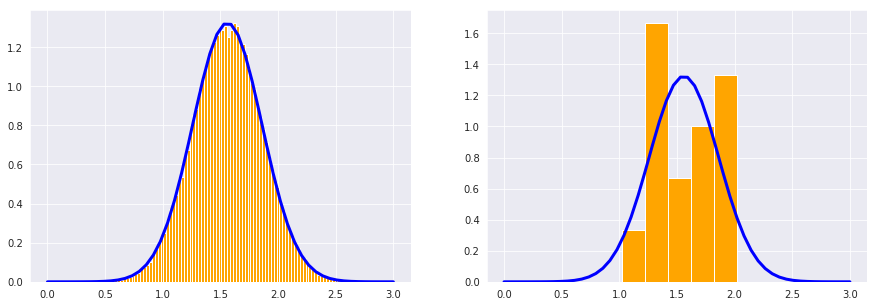

In [65]:
plt.figure(figsize=(15,5))

#generovana data
nbins = 100
x = norm.rvs(scale=std_u, loc=mean_u, size=100000)
plt.subplot(1,2,1)
plt.hist(x, bins=nbins, density=True, color='orange') # hodnoty
xx = np.linspace(0,3)
plt.plot(xx, norm.pdf(xx, scale=std_u, loc=mean_u), color='blue', lw=3) # normalni rozdeleni
plt.subplot(1,2,2)

# realna data
x = df.Affected
nbins = 5
plt.hist(x, bins=nbins, density=True, color='orange') # hodnoty
xx = np.linspace(0,3)
plt.plot(xx, norm.pdf(xx, scale=std_u, loc=mean_u), color='blue', lw=3) # normalni rozdeleni
plt.show()

In [ ]:
plt.figure(figsize=(15,5))

#generovana data
nbins = 100
x = norm.rvs(scale=std_u, loc=mean_u, size=100000)
plt.subplot(1,2,1)
plt.hist(x, bins=nbins, density=True, color='orange') # hodnoty
xx = np.linspace(0,3)
plt.plot(xx, norm.pdf(xx, scale=std_u, loc=mean_u), color='blue', lw=3) # normalni rozdeleni
plt.subplot(1,2,2)

# realna data
x = df.Affected
nbins = 5
plt.hist(x, bins=nbins, density=True, color='orange') # hodnoty
xx = np.linspace(0,3)
plt.plot(xx, norm.pdf(xx, scale=std_u, loc=mean_u), color='blue', lw=3) # normalni rozdeleni
plt.show()

## 5. (1b) 
    * Pro každou skupinu zvlášť spočítejte oboustranný 95% konfidenční interval pro střední hodnotu.

In [ ]:
# todo

## 6. (1b) 
* Pro každou skupinu zvlášť otestujte na hladině významnosti 5% hypotézu, zda je střední hodnota rovná hodnotě K (parametr úlohy), proti oboustranné alternativě. 
* Můžete použít buď výsledek z předešlého bodu, nebo výstup z příslušné vestavěné funkce vašeho softwaru.

In [ ]:
# todo

# 7. (2b) 
* Na hladině spolehlivosti 5% otestujte, jestli mají pozorované skupiny stejnou střední hodnotu. 
* Typ testu a alternativy stanovte tak, aby vaše volba nejlépe korespondovala s povahou zkoumaného problému.

In [ ]:
# todo